## Tabular models from scratch

* Back to the titanic data! (from Lesson 3)

* Note: On paperspace use jupyter lab for a better expereince. (Button on lower left)

* Using the clean notebook, which I am copying into here to run through myself

* Based partially on Chapter 4 (2nd part) and Chapter 9.

## TODO

[] Review chapter 4

[] Review chapter 9


In [1]:
import os
from pathlib import Path

import torch, numpy as np, pandas as pd

### Clean the data

In [2]:
path = Path('data/titanic')
df = pd.read_csv(path/'train.csv')
df.head(5)

There are some missing values

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Lets fill them with the modes.  This is the simplest possible way and is often good enough. Could be revisited to make sure this doesnt matter.  (We could use regression for example to predict the missing values.)

In [5]:
modes = df.mode().iloc[0]
df.fillna(modes, inplace=True)

Quick look at the data:

In [6]:
df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

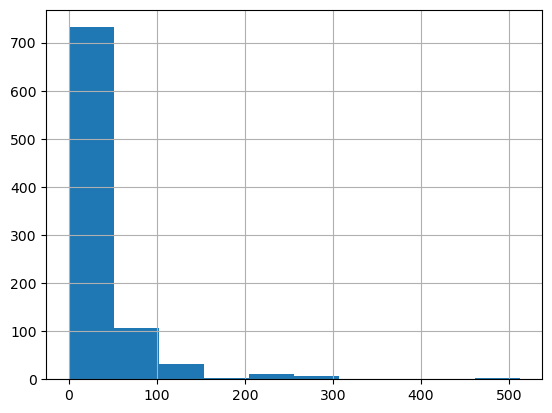

In [7]:
df['Fare'].hist()

Fare is better represented after a log transform. The +1 avoids zeros, and could be a hyperparameter??

As a rule of thumb,  things like Money and populations often work better with a log transform.

In [8]:
df['LogFare'] = np.log(df['Fare']+1)

<Axes: >

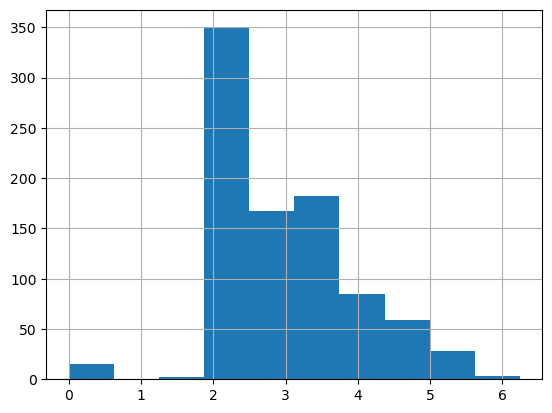

In [9]:
df['LogFare'].hist()

Now we need to deal with the non-numeric Categorical variables. We use dummy variables. Note that unlike in the video we need to use dtype = float to get numbers instead of booleans

In [10]:
df = pd.get_dummies(df, columns = ['Sex', 'Pclass','Embarked'], dtype = float)

In [11]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,LogFare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,2.110213,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,4.280593,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2.188856,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,3.990834,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B96 B98,2.202765,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [12]:
added_cols = df.columns[-8:]
added_cols

Index(['Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [13]:
df[added_cols].head()

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


Use pytorch ... does everything that numpy does but potentially faster :)

In [14]:
from torch import tensor

t_dep = tensor(df.Survived)


In [15]:
indep_cols = ['Age', 'SibSp', 'Parch', 'LogFare'] + list(added_cols)

t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[22.,  1.,  0.,  ...,  0.,  0.,  1.],
        [38.,  1.,  0.,  ...,  1.,  0.,  0.],
        [26.,  0.,  0.,  ...,  0.,  0.,  1.],
        ...,
        [24.,  1.,  2.,  ...,  0.,  0.,  1.],
        [26.,  0.,  0.,  ...,  1.,  0.,  0.],
        [32.,  0.,  0.,  ...,  0.,  1.,  0.]])

In [16]:
t_indep.shape

torch.Size([891, 12])

In [17]:
# rank is length of the shape;
len(t_indep.shape)

2

### Linear model

Since we have every level in our dummy variable swe dont need a constant (intercept).  (But don't we still have some colinearity here? )



In [18]:
# set seed for reproducibility
torch.manual_seed(442)
n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff) - 0.5  # Uniform but centered
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625])

In [19]:
t_indep * coeffs # element-wise multiplication with broadcasting

tensor([[-10.1838,   0.1386,   0.0000,  ...,  -0.0000,   0.0000,   0.3625],
        [-17.5902,   0.1386,   0.0000,  ...,  -0.4392,   0.0000,   0.0000],
        [-12.0354,   0.0000,   0.0000,  ...,  -0.0000,   0.0000,   0.3625],
        ...,
        [-11.1096,   0.1386,   0.4818,  ...,  -0.0000,   0.0000,   0.3625],
        [-12.0354,   0.0000,   0.0000,  ...,  -0.4392,   0.0000,   0.0000],
        [-14.8128,   0.0000,   0.0000,  ...,  -0.0000,   0.2103,   0.0000]])

Jeremy points out that this is done in optimized C or CUDA code. 

For more on broadcasting : [Numpy Docs](https://numpy.org/doc/stable/user/basics.broadcasting.html)

Note that the first column (Age) results in large values, which is not a big problem, but we should normalize it to have about the same range as the others.

In [20]:
vals, indices = t_indep.max(dim=0)
t_indep = t_indep / vals      # normalize by max value in each column .. broadcasting in action again

In [21]:
preds = (t_indep * coeffs).sum(dim=1)

In [22]:
preds[:10]

tensor([ 0.1412, -0.5725,  0.1494,  0.2571,  0.0453, -0.0448,  0.0792,  0.2961,
         0.2128, -0.5770])

In [23]:
(t_indep @ coeffs)[:10] # this is the same and more efficient

tensor([ 0.1412, -0.5725,  0.1494,  0.2571,  0.0453, -0.0448,  0.0792,  0.2961,
         0.2128, -0.5770])

In [24]:
loss = torch.abs(preds - t_dep).mean()
loss

tensor(0.5200)

In [25]:
def calc_preds(coeffs, indeps) : return indeps @ coeffs
def calc_loss(coeffs, indeps, dep): return torch.abs(calc_preds(coeffs, indeps) - dep).mean()

#### Gradient descent

In [26]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [27]:
loss = calc_loss(coeffs, t_indep, t_dep)  # calculate gradient
loss

tensor(0.5200, grad_fn=<MeanBackward0>)

In [28]:
loss.backward()
coeffs.grad

tensor([-0.0483,  0.0118, -0.0041, -0.0804, -0.1975,  0.1111, -0.1235, -0.0426,
         0.0797, -0.1886, -0.0617,  0.1639])

In [29]:
with torch.no_grad():
    coeffs.sub_(coeffs.grad * .1)  # _ means inplace
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.5056)


#### Training the linear model

In [30]:
from fastai.data.transforms import RandomSplitter
trn_splt, val_splt = RandomSplitter(seed = 42)(df)

In [31]:
trn_indep, val_indep = t_indep[trn_splt], t_indep[val_splt]
trn_dep, val_dep = t_dep[trn_splt], t_dep[val_splt]
len(trn_indep), len(val_indep)

(713, 178)

In [32]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_() # zero the gradient

def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    return loss


def init_coeffs(): return (torch.rand(n_coeff) - 0.5).requires_grad_()

def train_model(epochs = 30, lr = 0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs):
        loss = one_epoch(coeffs, lr)
        if i % 10 == 0:
            print(f'Epoch {i}: {loss.item()}')
    return coeffs

 

Wierd, it works better if I dont zero the gradient?  That doesnt seem right . But here I train longer and zero the gradients. Oh i see in the posted notebook this has been fixed

In [33]:
coeffs = train_model(50, lr = .1)

Epoch 0: 0.5182632207870483
Epoch 10: 0.399924099445343
Epoch 20: 0.3163571059703827
Epoch 30: 0.28397294878959656
Epoch 40: 0.2609443664550781


In [34]:
def show_coeffs(coeffs, indep_cols):
    coeffs = coeffs.detach().numpy()
    for i, c in enumerate(indep_cols):
        print(f'{c}: {coeffs[i]}')
show_coeffs(coeffs, indep_cols)

Age: -0.24572618305683136
SibSp: 0.05474322289228439
Parch: 0.21518781781196594
LogFare: -0.013952691107988358
Sex_female: 0.31767788529396057
Sex_male: -0.5088249444961548
Pclass_1: 0.6177637577056885
Pclass_2: 0.4543822109699249
Pclass_3: 0.39573177695274353
Embarked_C: 0.14990121126174927
Embarked_Q: 0.21982605755329132
Embarked_S: 0.15073229372501373


#### Measuring accuracy

In [35]:
preds = calc_preds(coeffs, val_indep)
results = val_dep.bool() == (preds > 0.5)
results.float().mean()

tensor(0.7921)

In [36]:
def acc(coeffs): return (val_dep.bool() == (calc_preds(coeffs, val_indep) > 0.5)).float().mean()
acc(coeffs)

tensor(0.7921)

#### Using sigmoid

We are predicting a 0 to 1 value (probability) so we should transform our real number into the range 0 to 1.

In [37]:
def calc_preds(coeffs, indeps) : return torch.sigmoid(indeps @ coeffs)


Note the MUCH higher lr

In [38]:
coeffs = train_model(50, lr = 100)

Epoch 0: 0.5029377341270447
Epoch 10: 0.19573019444942474
Epoch 20: 0.19426272809505463
Epoch 30: 0.19369982182979584
Epoch 40: 0.19339430332183838


In [39]:
acc(coeffs)

tensor(0.8258)

Jeremy comments on how sometimes you need to look into the source code to figure out what is going on.

For using these models, we focus a lot on the input and output because these what change for most models.. the input depends on our data, and the output layer depends on what are target is. 

For example using the sigmoid for a binary category.

#### Matrix Multiplication

Here the video talks about the the equivalence (for a matrix `A` and a vector `x`) of :

`A*x.sum(axis=1)` 
and
`A@x`   

They are both $\sum_j A_{ij} x_j$

In [40]:
(t_indep@coeffs)[:10]

tensor([-22.6884,  13.7634,  -3.2893,   6.8221, -22.7488, -14.8274, -12.6472,
        -22.7336,  -3.5027,  12.9300], grad_fn=<SliceBackward0>)

In [41]:
torch.einsum('ij,j->i', t_indep, coeffs)[:10]

tensor([-22.6884,  13.7634,  -3.2893,   6.8221, -22.7488, -14.8274, -12.6472,
        -22.7336,  -3.5027,  12.9300], grad_fn=<SliceBackward0>)

We are going to want to the have matrixes of coefficients... so for now we will make it an nx1 matrix, this way the result of the multiply will still be a matrix.

In [42]:
def init_coeffs(): return (torch.rand(n_coeff,1)*.1).requires_grad_()

The video doesnt mention this, but these initial coeffs are not centered, but it makes no nevermind.

In [43]:
trn_dep = trn_dep[:,None]    # add a dimension
val_dep = val_dep[:,None]

In [44]:
coeffs = train_model(50, lr = 100)

Epoch 0: 0.5116649866104126
Epoch 10: 0.1955496221780777
Epoch 20: 0.1941954642534256
Epoch 30: 0.19367285072803497
Epoch 40: 0.19338512420654297


In [45]:
coeffs

tensor([[ -1.1437],
        [ -1.4327],
        [ -0.8027],
        [  0.4718],
        [  9.0186],
        [-10.2429],
        [  3.4467],
        [  2.3370],
        [ -6.7921],
        [  1.8089],
        [  2.3951],
        [ -5.3072]], requires_grad=True)

So now coeffs is a column vector, or just a (rank 2) matrix with a unit trailing dimension

#### Neural Network

Add a hidden layer. 'it's all very fiddly' (In referecence to normalizing by n_hidden and subtracting 0.3)

> You'll notice here that there's a lot of messy constants to get the random numbers in just the right ranges. When you train the model in a moment, you'll see that the tiniest changes to these initialisations can cause our model to fail to train at all! This is a key reason that deep learning failed to make much progress in the early days -- it's very finicky to get a good starting point for our coefficients. Nowadays, we have ways to deal with that, which we'll learn about in other notebooks.

In [46]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden  
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [47]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

update all the layers

In [48]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

note we can here just keep using train model because we redefined things

In [53]:
coeffs = train_model(50, lr = 50)

Epoch 0: 0.5436185002326965
Epoch 10: 0.2607056200504303
Epoch 20: 0.1922227144241333
Epoch 30: 0.192185640335083
Epoch 40: 0.19217385351657867


In [54]:
acc(coeffs)

tensor(0.8258)

about the same... 

How about deep learning? You can add more layers. However , his inner layers he should have had bias vectors instead of constant terms. I made this change but it didn't really matter.

In [63]:
def init_coeffs():
    hiddens = [10, 10]  # <-- set this to the size of each hidden layer you want
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(sizes[i+1])-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [64]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [65]:
coeffs = train_model(50, lr = 2)

Epoch 0: 0.5040128827095032
Epoch 10: 0.210905522108078
Epoch 20: 0.19839537143707275
Epoch 30: 0.19533850252628326
Epoch 40: 0.1941794753074646


In [66]:
acc(coeffs)

tensor(0.8258)

Deep learning doesnt help here, but this is not a suprise, for this kind of data (structured) structure.
For unstructured data like images, you can 'chuck a deep learning model at it' , but for tabular data like this you need to think hard about feature engineering and then find a good model. 

#### Using fast ai framework

See notebook [Why you should use a framework](https://www.kaggle.com/code/jhoward/why-you-should-use-a-framework)

Observations:

* `TabularPandas` does all the preprocessing , including filling missing values for you in fast ai.

* `lr_find` does one batch of data at a time as it increases the learning rate and fastai will recommend a learning rate from this graph. One possible reference: [Cyclical learning rates for Training Neural Networks](https://arxiv.org/abs/1506.01186)


* Ensembling:   Demonstrated with multiple (identical) models with different initial conditions for coefficients. Suprisingly this is quite effective. 


#### Random Forest

[How random forests work](https://www.kaggle.com/code/jhoward/how-random-forests-really-work/)

This is the topic title for the next lesson, but here we have an introduction.  Chapter 9 discusses this for Titanic dataset.

Key observations:

* Elegant

* Almost impossible to mess up 

For today he starts the notebook as an introduction, using simple binary splits. 

To score split points he uses standard deviation * number of data points in each split subset. This is called the 'impurity'.  There are other measures of impurity.. probably we will cover later.  Note that for a binary classification problem like this,  with proportion p in the node, the standard deviation will be simply $\sqrt{p(1-p)}$.   So this scoring is $n \sqrt{p(1-p)}$ where n is the number of elements in that node.

The Gini impurity for this case would be something like $n p*(1-p)$  So this is similar to that, except for the square root.  Something to discuss ;)

In [86]:
test = np.array([1,0,0,1,0,1])
test.std()

0.5

In [87]:
np.sqrt(1/4)

0.5

### Chapter 4

### Chapter 9

Note this chapter will be covered in more detail in next lesson on Random forests.


Advice for Tabular Modeling:

* Random Forests are the easiest to train: Robust and fast.  Can be less accurate and are useless for extrapolation.

* Gradient Boosting-  Somewhat more sensitive to hyperparameters, but can be more accurate.

* Neural networks - Longer to train and sensitive to hyperparameters.  They can extrapolate better if you are carefull. I would add that they can also help when you need to combine in other unstructured data. (Although maybe better is to use embedding? 'convolve then boost'. ) .  Also very useful with high cardinality data so that you can take advantage of learned embeddings.

Book suggests starting with random forest to get a strong baseline.    Try adding embeddings for categorical variables and see if that helps your trees as well. 